<a href="https://colab.research.google.com/github/Murthy-Kolluru/modelthinking/blob/main/Session4SimAnnealing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

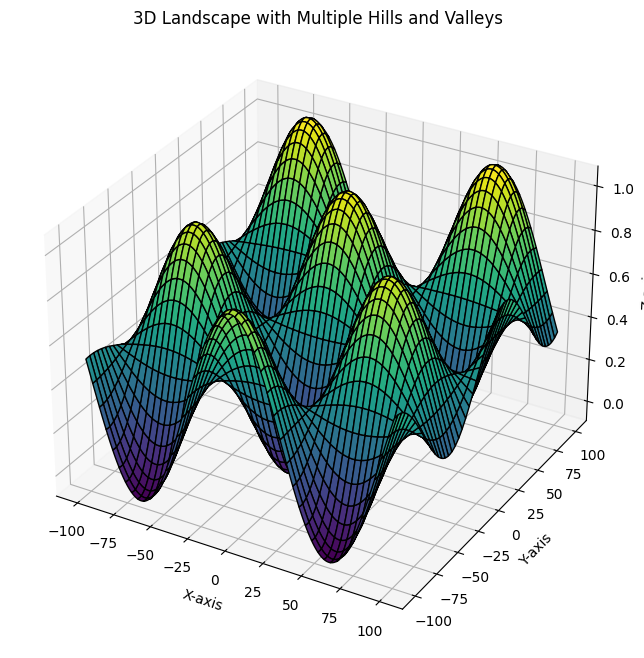

In [ ]:
#Hill climbing plot
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def landscape_function(x, y):
    # Adjust these parameters to customize the landscape
    amplitude = [0, 0.5, 0.1]  # Heights of the hills
    frequency = [0, 0.05, 0.01]  # Frequencies of the hills
    phase = [np.pi/2, np.pi, -np.pi/3]  # Phases of the hills
    offset = 0.5  # Base height

    z = offset
    for amp, freq, ph in zip(amplitude, frequency, phase):
        z += amp * np.cos(freq * (x + ph)) * np.sin(freq * (y + ph))

    return z

# Create a meshgrid for x and y
x = np.linspace(-100, 100, 1000)
y = np.linspace(-100, 100, 1000)
x, y = np.meshgrid(x, y)

# Calculate the corresponding z values using the landscape function
z = landscape_function(x, y)

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the landscape
ax.plot_surface(x, y, z, cmap='viridis', edgecolor='k')

# Customize the plot
ax.set_title('3D Landscape with Multiple Hills and Valleys')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# Show the plot
plt.show()


<ipython-input-2-b8bc083b9cef>:12: RuntimeWarning: overflow encountered in exp
  return np.exp(-delta_energy / temperature)



Initial Temperature: 10.0
Best Solution: (-5.63213647243894, 0.6156165777897393)
Best Objective: 19.240311020446185
Execution Time: 0.002016305923461914 seconds

Initial Temperature: 100.0
Best Solution: (10.380040178929594, 5.1568934556148704)
Best Objective: 847.1434917231174
Execution Time: 0.0003762245178222656 seconds

Initial Temperature: 1000.0
Best Solution: (17.42917745379346, 7.513952349313728)
Best Objective: 3289.144243706142
Execution Time: 0.00038313865661621094 seconds


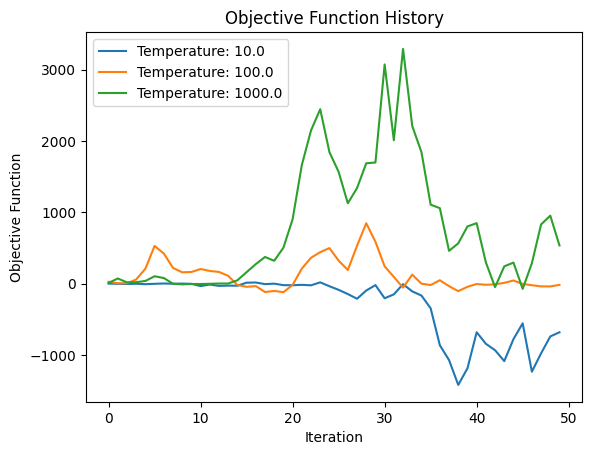

In [ ]:
#SA-Maxima-Minima-InitialEstimates
import numpy as np
import matplotlib.pyplot as plt
import time

# Define the cost function (the objective function)
def cost_function(x, y):
    return (x**2 * y + y**2 * x + 3 * y)

# Define the probability function based on the Metropolis criterion
def acceptance_probability(delta_energy, temperature):
    return np.exp(-delta_energy / temperature)

# Define the function to generate a neighbor solution
def generate_neighbor(x, y, perturbation_scale= 2):
    x_neighbor = x + np.random.uniform(-perturbation_scale, perturbation_scale)
    y_neighbor = y + np.random.uniform(-perturbation_scale, perturbation_scale)
    return x_neighbor, y_neighbor

# Simulated Annealing algorithm with time measurement
def simulated_annealing_with_time(cost_function, initial_solution, initial_temperature, cooling_rate, iterations):
    start_time = time.time()

    current_solution = initial_solution
    current_objective = cost_function(*current_solution)
    temperature = initial_temperature

    best_solution = current_solution
    best_objective = current_objective

    objective_history = []

    for iteration in range(iterations):
        # Generate a neighbor solution
        neighbor_solution = generate_neighbor(*current_solution)

        # Evaluate the cost of the current and neighbor solutions
        neighbor_objective = cost_function(*neighbor_solution)

        # Calculate the objective change
        delta_objective = neighbor_objective - current_objective

        # Accept or reject the neighbor solution based on the Metropolis criterion
        if delta_objective > 0 or np.random.rand() < acceptance_probability(delta_objective, temperature):
            current_solution = neighbor_solution
            current_objective = neighbor_objective

            # Update the best solution if needed
            if current_objective > best_objective:
                best_solution = current_solution
                best_objective = current_objective

        # Update temperature
        temperature *= cooling_rate

        # Record objective for analysis
        objective_history.append(current_objective)

    end_time = time.time()
    execution_time = end_time - start_time

    return best_solution, best_objective, objective_history, execution_time

# Set parameters
initial_solutions = [(1.0, 1.0), (1.0, 1.0), (1.0, 1.0)]
initial_temperatures = [10.0, 100.0, 1000.0]
cooling_rate = 0.95
iterations = 50

for initial_solution, initial_temperature in zip(initial_solutions, initial_temperatures):
    # Run simulated annealing
    best_solution, best_objective, objective_history, execution_time = simulated_annealing_with_time(cost_function, initial_solution, initial_temperature, cooling_rate, iterations)

    # Print results
    print(f"\nInitial Temperature: {initial_temperature}")
    print("Best Solution:", best_solution)
    print("Best Objective:", best_objective)
    print("Execution Time:", execution_time, "seconds")

    # Plot the objective function history
    plt.plot(objective_history, label=f'Temperature: {initial_temperature}')

plt.xlabel('Iteration')
plt.ylabel('Objective Function')
plt.title('Objective Function History')
plt.legend()
plt.show()



Best Solution: (12.88015056703399, 17.941904850045667)
Best Objective: 7176.631225301272
Execution Time: 0.0001704692840576172 seconds


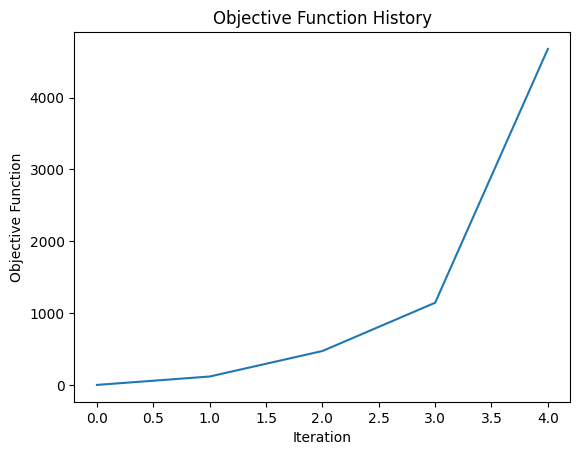

In [ ]:
#Simulated Annealing Exercise 2

import numpy as np
import matplotlib.pyplot as plt
import time

# Define the cost function (the objective function)
def cost_function(x, y):
    return (x**2 * y + y**2 * x + 3 * y)

# Define the probability function based on the Metropolis criterion
def acceptance_probability(delta_energy, temperature):
    return np.exp(-delta_energy / temperature)

# Define the function to generate a neighbor solution
def generate_neighbor(x, y, perturbation_scale= 2):
    x_neighbor = x + np.random.uniform(-perturbation_scale, perturbation_scale)
    y_neighbor = y + np.random.uniform(-perturbation_scale, perturbation_scale)
    return x_neighbor, y_neighbor

# Simulated Annealing algorithm with dynamic temperature and iterations
def simulated_annealing_dynamic(cost_function, initial_solution, initial_temperature, temperature_factor, iteration_factor):
    current_solution = initial_solution
    current_objective = cost_function(*current_solution)
    temperature = initial_temperature
    iterations = 20  # Initial iterations

    best_solution = current_solution
    best_objective = current_objective

    objective_history = []

    consecutive_non_improving_iterations = 0

    while consecutive_non_improving_iterations < 5:
        start_time = time.time()

        for iteration in range(iterations):
            # Generate a neighbor solution
            neighbor_solution = generate_neighbor(*current_solution)

            # Evaluate the cost of the current and neighbor solutions
            neighbor_objective = cost_function(*neighbor_solution)

            # Calculate the objective change
            delta_objective = neighbor_objective - current_objective

            # Accept or reject the neighbor solution based on the Metropolis criterion
            if delta_objective > 0 or np.random.rand() < acceptance_probability(delta_objective, temperature):
                current_solution = neighbor_solution
                current_objective = neighbor_objective

                # Update the best solution if needed
                if current_objective > best_objective:
                    best_solution = current_solution
                    best_objective = current_objective

        end_time = time.time()
        execution_time = end_time - start_time

        # Record objective for analysis
        objective_history.append(current_objective)

        # Update temperature and iterations
        temperature *= temperature_factor
        iterations = max(int(iterations * iteration_factor), 1)

        # Check for termination condition (0.1% improvement in the last 5 iterations)
        improvement_threshold = 0.001 * best_objective
        if current_objective > best_objective + improvement_threshold:
            consecutive_non_improving_iterations = 0
        else:
            consecutive_non_improving_iterations += 1

    return best_solution, best_objective, objective_history, execution_time

# Set parameters
initial_solution = (1.0, 1.0)
initial_temperature = 1000.0
temperature_factor = 0.95
iteration_factor = 0.95

# Run simulated annealing with dynamic temperature and iterations
best_solution, best_objective, objective_history, execution_time = simulated_annealing_dynamic(cost_function, initial_solution, initial_temperature, temperature_factor, iteration_factor)

# Print results
print("Best Solution:", best_solution)
print("Best Objective:", best_objective)
print("Execution Time:", execution_time, "seconds")

# Plot the objective function history
plt.plot(objective_history)
plt.xlabel('Iteration')
plt.ylabel('Objective Function')
plt.title('Objective Function History')
plt.show()


# Based on a student suggestion, I shall print all my prompts from here in the text box above the corresponding code.  As much as possible.

Plot x^2+y^2=1 in a 3D plot with z ranging from -10 to 10 as a sub plot.  Plot z=x+y in another sub plot.  

*I got a wrong output.*  I updated with

I do not want the cylinder surface in the sub plot.  I want to see the full cylinder between z from -10 to z=10

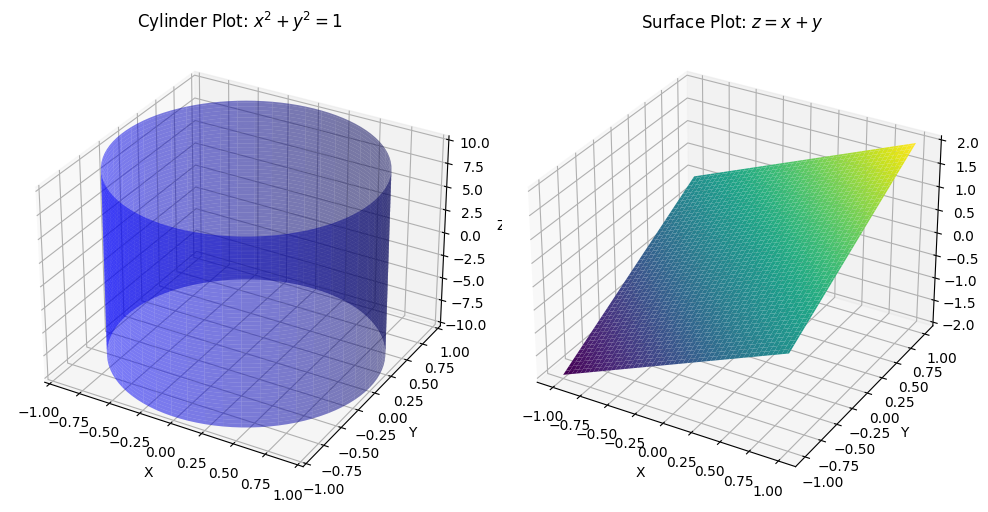

In [1]:
#Plotting the constraint and the function

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create data for the cylinder
theta = np.linspace(0, 2*np.pi, 100)
z_cylinder = np.linspace(-10, 10, 100)
theta, z_cylinder = np.meshgrid(theta, z_cylinder)
x_cylinder = np.cos(theta)
y_cylinder = np.sin(theta)

# Create data for the plane plot
x_plane = np.linspace(-1, 1, 100)
y_plane = np.linspace(-1, 1, 100)
x_plane, y_plane = np.meshgrid(x_plane, y_plane)
z_plane = x_plane + y_plane  # z = x + y

# Plotting
fig = plt.figure(figsize=(10, 5))

# Cylinder plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x_cylinder, y_cylinder, z_cylinder, color='b', alpha=0.5)
ax1.set_title('Cylinder Plot: $x^2 + y^2 = 1$')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_xlim(-1, 1)
ax1.set_ylim(-1, 1)
ax1.set_zlim(-10, 10)

# Plane plot
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x_plane, y_plane, z_plane, cmap='viridis')
ax2.set_title('Surface Plot: $z = x + y$')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

plt.tight_layout()
plt.show()


# Prompt

**Original: ** I want to use simulated annealing to find the maximum of x+y under the constraints x^2+y^2=1.  Here are a few things I want.  Let us implicitly implement the constraint.  To do that, initialize only x between -1 and 1.  Compute y as sqrt(1-x^2).  Take positive and negative values 50-50.  Ensure you do this for neighbor generation also.  Only generate x.  Next, start with 3 temperatures 1, 10, 100.  At each temperature do 50 iterations.  Print the final objective at each temperature.  Also, plot how the objective varied at each iteration for all three temperatures.

**Correction 1: ** As my objective is maximization your metropolis functions looks incorrect.  Can you recheck?

ChatGPT:  Apologies for the oversight. You are correct; we need to adjust the Metropolis criterion for maximization. Here's the corrected implementation:

**Corection 2:**  temps = [init_temp, 10, 100], did you mean temps=[1, 10, 100]?

ChatGPT:  Yes, you are correct. I apologize for the oversight. I meant temps=[1, 10, 100] instead of temps=[init_temp, 10, 100]. Thank you for catching that mistake. Here's the corrected line:

Final objective at temperature 1: -1.3502473207234633
Final objective at temperature 10: 1.3953774810492359
Final objective at temperature 100: -1.2012522300849904


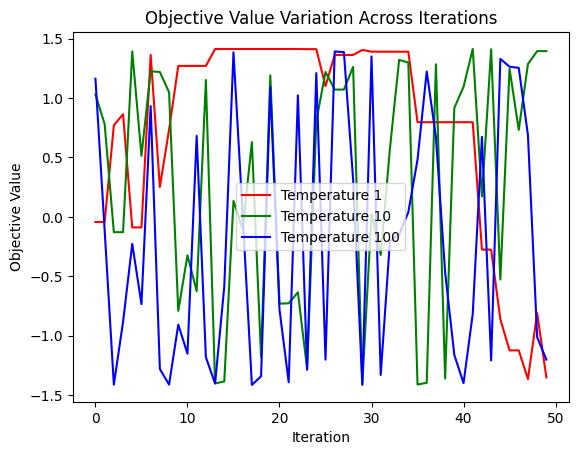

In [2]:
#Simulated annealing with a constraint

import numpy as np
import matplotlib.pyplot as plt

def objective(x, y):
    return x + y

def random_neighbor(x):
    return np.random.uniform(-1, 1)

def energy(x, y):
    return objective(x, y)

def metropolis(delta_energy, temp):
    if delta_energy > 0:
        return True
    return np.random.rand() < np.exp(delta_energy / temp)

def anneal(init_temp, iterations):
    temps = [1, 10, 100]
    results = []
    for temp in temps:
        x = np.random.uniform(-1, 1)
        y = np.sqrt(1 - x ** 2)
        objective_values = []
        for _ in range(iterations):
            x_new = random_neighbor(x)
            y_new = np.sqrt(1 - x_new ** 2) if np.random.rand() < 0.5 else -np.sqrt(1 - x_new ** 2)
            delta_energy = energy(x_new, y_new) - energy(x, y)
            if metropolis(delta_energy, temp):
                x, y = x_new, y_new
            objective_values.append(objective(x, y))
        results.append((x, y, objective_values))
        print(f"Final objective at temperature {temp}: {objective(x, y)}")
    return results

def plot_results(results):
    temps = [1, 10, 100]
    colors = ['r', 'g', 'b']
    for i, (x, y, objective_values) in enumerate(results):
        plt.plot(objective_values, color=colors[i], label=f'Temperature {temps[i]}')
    plt.xlabel('Iteration')
    plt.ylabel('Objective Value')
    plt.legend()
    plt.title('Objective Value Variation Across Iterations')
    plt.show()

if __name__ == "__main__":
    results = anneal(1, 50)
    plot_results(results)


# Prompt

Let me now go for 1000 iterations.  Let us take a temperature of 1.  Let us do 20 iterations there.  Use a cooling factor of 0.95 for both temperature and iterations.  Rest is same as above.

*It made several mistakes.  I kept pasting the error.  After multiple attempts, I asked it to redo the code from scratch*

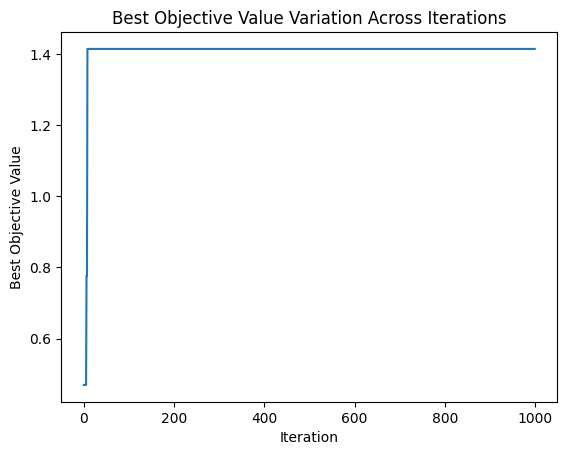

Best objective: 1.4142135477222224


In [5]:
#SA with constraint final

import numpy as np
import matplotlib.pyplot as plt

def objective(x, y):
    return x + y

def random_neighbor(x):
    return np.random.uniform(-1, 1)

def energy(x, y):
    return objective(x, y)

def metropolis(delta_energy, temp):
    if delta_energy > 0:
        return True
    return np.random.rand() < np.exp(delta_energy / temp)

def anneal(init_temp, init_iterations, final_iterations, cooling_factor):
    results = []
    x = np.random.uniform(-1, 1)
    y = np.sqrt(1 - x ** 2) if np.random.rand() < 0.5 else -np.sqrt(1 - x ** 2)
    best_objective = objective(x, y)
    for _ in range(init_iterations):
        x_new = random_neighbor(x)
        y_new = np.sqrt(1 - x_new ** 2) if np.random.rand() < 0.5 else -np.sqrt(1 - x_new ** 2)
        delta_energy = energy(x_new, y_new) - energy(x, y)
        if metropolis(delta_energy, init_temp):
            x, y = x_new, y_new
            current_objective = objective(x, y)
            if current_objective > best_objective:
                best_objective = current_objective
        results.append(best_objective)
    temp = init_temp
    while temp > 1:
        temp *= cooling_factor
        for _ in range(final_iterations):
            x_new = random_neighbor(x)
            y_new = np.sqrt(1 - x_new ** 2) if np.random.rand() < 0.5 else -np.sqrt(1 - x_new ** 2)
            delta_energy = energy(x_new, y_new) - energy(x, y)
            if metropolis(delta_energy, temp):
                x, y = x_new, y_new
                current_objective = objective(x, y)
                if current_objective > best_objective:
                    best_objective = current_objective
            results.append(best_objective)
    return best_objective, results

def plot_results(results):
    plt.plot(results)
    plt.xlabel('Iteration')
    plt.ylabel('Best Objective Value')
    plt.title('Best Objective Value Variation Across Iterations')
    plt.show()

if __name__ == "__main__":
    init_temp = 1
    init_iterations = 1000
    final_iterations = 20
    cooling_factor = 0.95
    best_obj, results = anneal(init_temp, init_iterations, final_iterations, cooling_factor)
    plot_results(results)
    print(f"Best objective: {best_obj}")


**Let us develop the code for decrypting messages one step at a time**

In [ ]:
from google.colab import drive

# Mount Google Drive
#drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

import numpy as np
import matplotlib.pyplot as plt

# Extract the symbols and the text to be used to calculate the transition probabilities of English language
def read_files(symbols_filename, text_filename):
    symbols_file_path = '/content/drive/MyDrive/' + symbols_filename
    text_file_path = '/content/drive/MyDrive/' + text_filename

    with open(symbols_file_path) as symbols_file:
        symbols_content = symbols_file.read()
        symbols = symbols_content.splitlines()
        symbols = [s.strip() for s in symbols]
        symbols[1] = " "

    with open(text_file_path) as text_file:
        text_content = text_file.read()
        text = text_content.lower()

    return symbols, text

# Read symbols from sym.txt and text from warandpeace.txt
symbols, text = read_files("sym.txt", "warandpeace.txt")

# Print the first 500 characters of symbols and text
print("First 50 characters of symbols:")
print(symbols[:50])  # Print the first 50 characters of symbols list
print("\nFirst 500 characters of text:")
print(text[:500])     # Print the first 500 characters of text content



Mounted at /content/drive
First 50 characters of symbols:
['=', ' ', ',', ';', '!', '?', "'", '"', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

First 500 characters of text:
the project gutenberg ebook of war and peace, by leo tolstoy

this ebook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  you may copy it, give it away or
re-use it under the terms of the project gutenberg license included
with this ebook or online at www.gutenberg.org


title: war and peace

author: leo tolstoy

translators: louise and aylmer maude


release date: april, 2001 [ebook #2600]
last updated: february 7, 2013

language: english

character set 


In [ ]:
import numpy as np

def transitions(symbols, text):
    # Initialize a square matrix to store transition probabilities,
    # with dimensions equal to the number of symbols plus one for text transitions
    num_symbols = len(symbols)
    trans_probs = np.ones((num_symbols + 1, num_symbols + 1))

    # Iterate over the text to count transitions between symbols and text
    for n in range(1, len(text)):
        # Check if the current character is in symbols
        if text[n] in symbols:
            # Get the index of the current character in symbols
            index_1 = symbols.index(text[n])
            # Increment the corresponding entry in the transition matrix
            # to count the transition from the current character to the text
            trans_probs[num_symbols, index_1] += 1
            # Increment the corresponding entry in the transition matrix
            # to count the transition from the text to the current character
            trans_probs[index_1, num_symbols] += 1

        # Check if both the current and previous characters are in symbols
        if text[n-1] in symbols and text[n] in symbols:
            # Get the indices of the previous and current characters in symbols
            index_1 = symbols.index(text[n-1])
            index_2 = symbols.index(text[n])
            # Increment the corresponding entry in the transition matrix
            # to count the transition from the previous character to the current character
            trans_probs[index_2, index_1] += 1

    # Normalize transition probabilities by dividing each row by the total count of occurrences of the corresponding symbol
    for l in range(trans_probs.shape[0]):
        total_count = np.sum(trans_probs[l])
        if total_count != 0:
            trans_probs[l] /= total_count

    return trans_probs

# Read symbols from sym.txt and text from warandpeace.txt
symbols, text = read_files("sym.txt", "warandpeace.txt")

# Calculate the transition probabilities matrix
trans_matrix = transitions(symbols, text)

# Print the dimensions of the transition probability matrix
print("Dimensions of the Transition Probability Matrix:", trans_matrix.shape)



Dimensions of the Transition Probability Matrix: (45, 45)


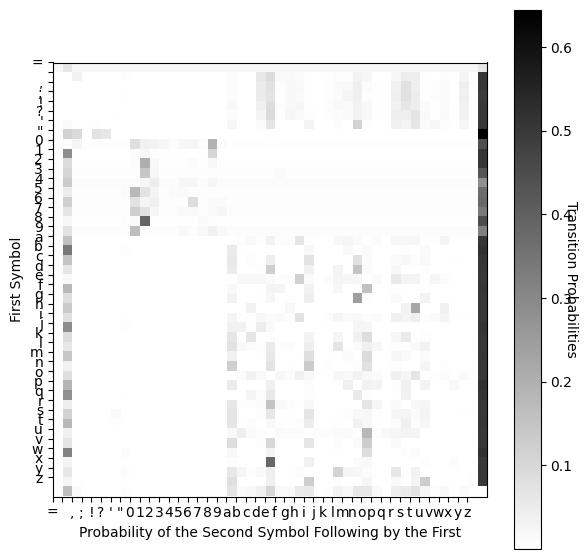

In [ ]:
# Visualizes the transition matrix as a Hinton diagram
def hinton_diagram():

    plt.figure(figsize=(7,7))
    s = []
    for i in range(len(symbols)):
        s.append(i-0.5)

    plt.xticks(s, symbols)
    plt.yticks(s, symbols)
    plt.ylabel("First Symbol")
    plt.xlabel("Probability of the Second Symbol Following by the First")
    plt.imshow(trans_matrix, "binary")

    legend = plt.colorbar()
    legend.set_label("Transition Probabilities", rotation=270)
    plt.show()

hinton_diagram()

In [ ]:
import numpy as np

def Simulated_Annealing(max_iterations=15000, initial_temperature=1.0, cooling_rate=0.001):
    current_permutation = symbols.copy()
    np.random.shuffle(current_permutation)

    current_message = decipher(message, current_permutation)
    current_energy = -log_like(current_message)

    best_permutation = current_permutation
    best_energy = current_energy

    for i in range(max_iterations):
        temperature = initial_temperature / (1 + cooling_rate * i)

        index_1 = np.random.randint(len(current_permutation))
        index_2 = np.random.randint(len(current_permutation))

        while index_1 == index_2:
            index_2 = np.random.randint(len(current_permutation))

        new_permutation = current_permutation.copy()
        new_permutation[index_1], new_permutation[index_2] = new_permutation[index_2], new_permutation[index_1]

        new_message = decipher(message, new_permutation)
        new_energy = -log_like(new_message)

        energy_difference = new_energy - current_energy

        if energy_difference < 0 or np.random.random() < np.exp(-energy_difference / temperature):
            current_permutation = new_permutation
            current_energy = new_energy

            if current_energy < best_energy:
                best_permutation = current_permutation
                best_energy = current_energy

        if i % 1000 == 0:
            print("Number of iterations:", i)
            print("Best Log-likelihood:", -best_energy)
            print(decipher(message, best_permutation))


In [ ]:
# Calculate the log likelihood of a deciphered message according to transition probabilities
def log_like(deciphered_message):

    log_like = 0
    for i in range(1, len(deciphered_message)):
        if (deciphered_message[i-1] in symbols and deciphered_message[i] in symbols):
            index_1 = symbols.index(deciphered_message[i-1])
            index_2 = symbols.index(deciphered_message[i])

            if (trans_matrix[index_2,index_1]) > 0:
                log_probs = np.log(trans_matrix[index_2,index_1])
                log_like += log_probs

    return log_like
# Return the new message generated according to the new permutation

def decipher(current_message, new_permutation):
    # Create a dictionary mapping old symbols to new symbols
    sigma = {symbols[i]: new_permutation[i] for i in range(len(symbols))}

    # Initialize an empty string to store the new message
    new_message = ""

    # Iterate over each character in the current message
    for m in current_message:
        # Check if the character is in the dictionary
        if m in sigma:
            # If it is, append the corresponding new symbol to the new message
            new_message += sigma[m]
        else:
            # If it's not, it may be a special character like newline or whitespace
            # Simply append it to the new message without decryption
            new_message += m

    return new_message


In [ ]:
def read_message(message_content):
    # Convert the message to lowercase
    message = message_content.lower()
    return message

# Example message to decipher (paste your message here)
message_content = """
h2'h6 6c9''2"mx  b9?"1692, mkb?"b"5 926 6"mkb5 h5?96k1, 0kh15 r""29b; h2 2x" h2'h6 mhrs 6o mxh91"5 0, r1 5""shc sh1"cxo mxh91rhbo x5fmj h'6k dk9b"5 0, h ?"1, 6s"m9h' ; "62 kf xkbk 1 – 0h1kb"66 1k,h'' kf 0'h965kbo 'h5, dhb"2 1k,h'' – s19bm9sh' kf 6kr"1?9''" mk''";"o  b9?"1692, kf k3fk15.  2x96 e""c e" e92b"66"5 2x" s1"6"bm" kf "321hk159bh1, '"h5"16 fk1 2x" r""29b;. 92 eh6 ,"2 hbk2x"1 kssk12 b92, 2k "b;h;" e92x 2x" '"h5"16x9s kb 2x" h2'h6 ?969kb 2k m1"h2" h 5""s"1 9b2";1h29kb 0"2e""b 9b5 621, hb5 hmh5"r9h 2k b 12 1" ,k b; 2h'"b2 2k 0" 0"22"1 s1"sh1"5 hb5 6c9''"5 fk1 9b5 621, 4.a.  h 09; hmx9"?"r"b2 fk1 h2'h6 6c9''2"mx  b9?"1692, h6 e" 1"m9"?"5 2x" heh15 fk1 2x" “rk62 f 2 19629m & '"h59b; 6c9''  b9?"1692, kf 2x" ,"h1 tatt” 9b59h heh15  b5"1 “9bbk?h29?" 2"hmx9b; hss1khmxo 7 h'92, "5 mh29kb & '"h59b; 9bf1h621 m2 1" “mh2";k1, fk1 2x" ,"h1 tatt (;'k0h' "5929kb). f1kr 2x" s1"629;9k 6 bh29kbh' h1mx92"m2 1" hb5 9b2"19k1 5"69;b "3m"''"bm" heh156 tatt- ;'k0h' "5929kb. 2x96 mkbf"1"bm" hb5 "?"b2 x"'5 9b 0"b;h' 1  e92b"66"5 2x" s1"6"bm" kf rk1" 2xhb 4na h1mx92"m26 / 01hb56 / 9b2"19k1 5"69;b"16 / 0 9'5"16/ 5"69;b 9b6292 2"6  b5"1 kb" 1kkf.
"""

# Read the message directly from the code
message = read_message(message_content)

In [ ]:
print("Message to decipher: \n" + str(message) + "\nNumber of symbols: " + str(len(message)))

Message to decipher: 

h2'h6 6c9''2"mx  b9?"1692, mkb?"b"5 926 6"mkb5 h5?96k1, 0kh15 r""29b; h2 2x" h2'h6 mhrs 6o mxh91"5 0, r1 5""shc sh1"cxo mxh91rhbo x5fmj h'6k dk9b"5 0, h ?"1, 6s"m9h' ; "62 kf xkbk 1 – 0h1kb"66 1k,h'' kf 0'h965kbo 'h5, dhb"2 1k,h'' – s19bm9sh' kf 6kr"1?9''" mk''";"o  b9?"1692, kf k3fk15.  2x96 e""c e" e92b"66"5 2x" s1"6"bm" kf "321hk159bh1, '"h5"16 fk1 2x" r""29b;. 92 eh6 ,"2 hbk2x"1 kssk12 b92, 2k "b;h;" e92x 2x" '"h5"16x9s kb 2x" h2'h6 ?969kb 2k m1"h2" h 5""s"1 9b2";1h29kb 0"2e""b 9b5 621, hb5 hmh5"r9h 2k b 12 1" ,k b; 2h'"b2 2k 0" 0"22"1 s1"sh1"5 hb5 6c9''"5 fk1 9b5 621, 4.a.  h 09; hmx9"?"r"b2 fk1 h2'h6 6c9''2"mx  b9?"1692, h6 e" 1"m9"?"5 2x" heh15 fk1 2x" “rk62 f 2 19629m & '"h59b; 6c9''  b9?"1692, kf 2x" ,"h1 tatt” 9b59h heh15  b5"1 “9bbk?h29?" 2"hmx9b; hss1khmxo 7 h'92, "5 mh29kb & '"h59b; 9bf1h621 m2 1" “mh2";k1, fk1 2x" ,"h1 tatt (;'k0h' "5929kb). f1kr 2x" s1"629;9k 6 bh29kbh' h1mx92"m2 1" hb5 9b2"19k1 5"69;b "3m"''"bm" heh156 tatt- ;'k0h' "5929kb. 2x96 m

In [ ]:
Simulated_Annealing(20000,10,0.001)

Number of iterations: 0
Best Log-likelihood: -8417.081170768546

x9 xzjzns  9b?fjjhs3bmzs9uj?yh3bhbojs9zjzb?yhojxo3szymujryxmojgbb9shwjx9j9fbjx9 xzj?xgvjzlj?fxsmbojrujgmjobbvxnjvxmbnflj?fxsmgxhljfo,?ijx zyj6yshbojrujxj3bmujzvb?sx jwjbz9jy,jfyhyjmj–jrxmyhbzzjmyux  jy,jr xszoyhlj xouj6xhb9jmyux  j–jvmsh?svx jy,jzygbm3s  bj?y  bwbljjhs3bmzs9ujy,jya,ymo.jj9fszj5bbnj5bj5s9hbzzboj9fbjvmbzbh?bjy,jba9mxymoshxmuj bxobmzj,ymj9fbjgbb9shw.js9j5xzjub9jxhy9fbmjyvvym9jhs9uj9yjbhwxwbj5s9fj9fbj bxobmzfsvjyhj9fbjx9 xzj3szsyhj9yj?mbx9bjxjobbvbmjsh9bwmx9syhjrb95bbhjshojz9mujxhojx?xobgsxj9yjhjm9jmbjuyjhwj9x bh9j9yjrbjrb99bmjvmbvxmbojxhojzns  boj,ymjshojz9mujp.1.jjxjrswjx?fsb3bgbh9j,ymjx9 xzjzns  9b?fjjhs3bmzs9ujxzj5bjmb?sb3boj9fbjx5xmoj,ymj9fbj“gyz9j,j9jmsz9s?j&j bxoshwjzns  jjhs3bmzs9ujy,j9fbjubxmj7177”jshosxjx5xmojjhobmj“shhy3x9s3bj9bx?fshwjxvvmyx?flj0jx s9ujboj?x9syhj&j bxoshwjsh,mxz9mj?9jmbj“?x9bwymuj,ymj9fbjubxmj7177j(w yrx jbos9syh).j,mygj9fbjvmbz9swsyjzjhx9syhx jxm?fs9b?9jmbjxhojsh9bmsymjobzswhjba?b

In [ ]:
def read_message(message_content):
    # Convert the message to lowercase
    message = message_content.lower()
    return message

# Example message to decipher (paste your message here)
message_content = """
nxub"=p9k ;1 x k,v;pe k,u k2qe,p2 p=9j2 b,1;n, =p2,npkj=7 kqbu=kk=;p. = 2j=pr en. uqn2jo =k n=e=vq";qk.  1=nk2"ot j, vj,x2,e qk !=2j 2j, 2=2", ;1 2j, v;qnk,.  bn;t = 2j;q9j2 u;e," 2j=pr=p9 =k x v;qnk, !j,n, !, 2x"r x ";2 xb;q2 n,x" v;;" u;e,"k xpe p;2 2j, kvxno ux2j,ux2=vx" ;p,k.  p,y2 2=u,t = !="" ;p"o 2xr, 2j=k v;qnk, =1 =2 =k ;11,n,e bo 2j, e,k=9p kvj;;".  k,v;pe"ot 2j, 5;r,k =p 2j, p;2, b;;r.  eqe,t =k j, n,x""o k,n=;qkw  = x"k; 2j;q9j2 !j,p j, 2x"rk xb;q2 e,1,pv, xpe xbeq" rx"xut j, !xk 1",y=p9.  bn;t !, p,0,n kx! 2j,u 2;9,2j,n n=9j2. = n,x""o !=kj 2j,n, !xk x !xo !j,n, = vxp kr=7 x"" 2j, v"xkk,k xpe k2="" 9,2 2j, j=9j,k2 kv;n, =p =p2,npkj=7.  uo b=99,n !;nno =k 2jx2 j, jxk x p,9x2=0, 2j=p9 ;p 7n;1. rquxn.  x2 ",xk2t = j;7, j, !="" b, n,xk;pxb", =p 2j, ,yxu=px2=;pk.  =1 p;2 =p2,npkj=7t x 9;;e 9nxe, =k p=v, ,p;q9j.  e; o;q rp;! bn;t 2j, b=8 kvj;;" 9qok xn, 2xr=p9 expv=p9t k!=uu=p9t uxr=p9 kjx7,k !=2j 7x7,nk r=pe ;1 v;qnk,k.  j,n,t !, xn,.  eqe, =k en;!p=p9 qk =p 1,nu= ,k2=ux2,kt bnq2, 1;nv,t eopxu=v 7n;9nxuu=p9 xpe k=uq"x2,e xpp,x"=p9.  ;u9 bn;t =1 = n,xe 2j,u x"" "=r, 2jx2 2j,o k;qpe "=r, k!,xn !;nek.  p;2 kqn, !j,p 2j, eqe, 1=pek 2=u,.  9=0,k fl 7x9,k ,y2nx k2q11 ,0,no 2!; !,,rk.  2j=k =k 2;2x""o qpv;;" uxp.
"""

# Read the message directly from the code
message = read_message(message_content)

print("Message to decipher: \n" + str(message) + "\nNumber of symbols: " + str(len(message)))

Simulated_Annealing(20000,10,0.001)


Message to decipher: 

nxub"=p9k ;1 x k,v;pe k,u k2qe,p2 p=9j2 b,1;n, =p2,npkj=7 kqbu=kk=;p. = 2j=pr en. uqn2jo =k n=e=vq";qk.  1=nk2"ot j, vj,x2,e qk !=2j 2j, 2=2", ;1 2j, v;qnk,.  bn;t = 2j;q9j2 u;e," 2j=pr=p9 =k x v;qnk, !j,n, !, 2x"r x ";2 xb;q2 n,x" v;;" u;e,"k xpe p;2 2j, kvxno ux2j,ux2=vx" ;p,k.  p,y2 2=u,t = !="" ;p"o 2xr, 2j=k v;qnk, =1 =2 =k ;11,n,e bo 2j, e,k=9p kvj;;".  k,v;pe"ot 2j, 5;r,k =p 2j, p;2, b;;r.  eqe,t =k j, n,x""o k,n=;qkw  = x"k; 2j;q9j2 !j,p j, 2x"rk xb;q2 e,1,pv, xpe xbeq" rx"xut j, !xk 1",y=p9.  bn;t !, p,0,n kx! 2j,u 2;9,2j,n n=9j2. = n,x""o !=kj 2j,n, !xk x !xo !j,n, = vxp kr=7 x"" 2j, v"xkk,k xpe k2="" 9,2 2j, j=9j,k2 kv;n, =p =p2,npkj=7.  uo b=99,n !;nno =k 2jx2 j, jxk x p,9x2=0, 2j=p9 ;p 7n;1. rquxn.  x2 ",xk2t = j;7, j, !="" b, n,xk;pxb", =p 2j, ,yxu=px2=;pk.  =1 p;2 =p2,npkj=7t x 9;;e 9nxe, =k p=v, ,p;q9j.  e; o;q rp;! bn;t 2j, b=8 kvj;;" 9qok xn, 2xr=p9 expv=p9t k!=uu=p9t uxr=p9 kjx7,k !=2j 7x7,nk r=pe ;1 v;qnk,k.  j,n,t !, xn,.  eqe, =k en;!p=p9 qk